In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,KFold,validation_curve
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import optuna

In [2]:
data=pd.read_csv(r"C:\Users\Avijit\Desktop\AgriAssure\AGRIYIELDPRO\PROCESSED_DATASET\yield5.csv")

In [3]:
x,y=data.iloc[:,:-1],data.iloc[:,-1:]

In [4]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=42,train_size=0.8)

In [52]:
def objective(trial):
    params = {
        "fit_intercept": trial.suggest_categorical("fit_intercept", [True, False]),
        "copy_X": trial.suggest_categorical("copy_X", [True, False]),
        "positive": trial.suggest_categorical("positive", [True, False])
    }
    model=LinearRegression(**params)
    score=cross_val_score(model,xtrain,ytrain,scoring='r2',cv=KFold(n_splits=5))
    return score.mean()

In [39]:
study=optuna.create_study(storage=r'sqlite:///C:/Users/Avijit/Desktop/AgriAssure/AGRIYIELD PRO/RESULT/LINEAR_REGRESSION/linear_regression2.db',
                          study_name='linear_regression2',
                          load_if_exists=True,
                          direction='maximize'
                          )

[I 2025-07-07 16:30:18,468] A new study created in RDB with name: linear_regression2


In [60]:
study.optimize(objective,n_trials=30)

[I 2025-07-07 17:31:10,344] Trial 30 finished with value: 0.018037768551516196 and parameters: {'fit_intercept': True, 'copy_X': True, 'positive': True}. Best is trial 0 with value: 0.01840874988184644.
[I 2025-07-07 17:31:10,431] Trial 31 finished with value: 0.018037768551516196 and parameters: {'fit_intercept': True, 'copy_X': False, 'positive': True}. Best is trial 0 with value: 0.01840874988184644.
[I 2025-07-07 17:31:10,511] Trial 32 finished with value: 0.018037768551516196 and parameters: {'fit_intercept': True, 'copy_X': False, 'positive': True}. Best is trial 0 with value: 0.01840874988184644.
[I 2025-07-07 17:31:10,593] Trial 33 finished with value: 0.018037768551516196 and parameters: {'fit_intercept': True, 'copy_X': False, 'positive': True}. Best is trial 0 with value: 0.01840874988184644.
[I 2025-07-07 17:31:10,675] Trial 34 finished with value: -2.8663574086739176 and parameters: {'fit_intercept': False, 'copy_X': False, 'positive': False}. Best is trial 0 with value: 0

In [ ]:
model=LinearRegression(**params)
model.fit(xtrain,ytrain)
model.score(xtrain,ytrain)
model.score(xtest,ytest)

6.149628956199438

In [67]:
ypred=model.predict(xtest)

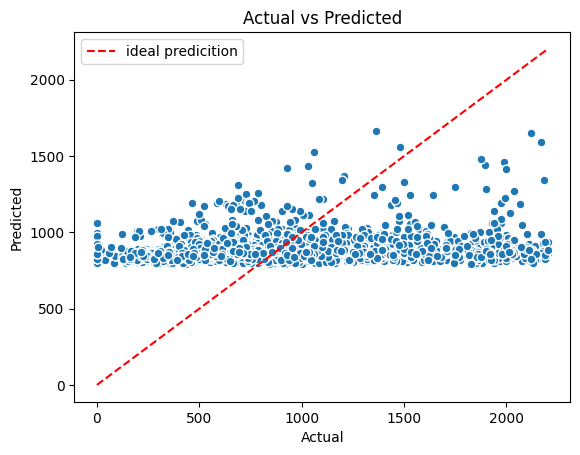

In [68]:
ymin=ytest.min()
ymax=ytest.max()
plt.scatter(ytest,ypred,edgecolors='white',s=40)
plt.plot([ymin,ymax],[ymin,ymax],'r--',label='ideal predicition')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

In [57]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error

In [58]:
r2=r2_score(ytest,ypred)
mae=mean_absolute_error(ytest,ypred)
rootmse=root_mean_squared_error(ytest,ypred)
score=[mae,rootmse,r2]
metrics=['MAE',"RMSE","ROOTMSE"]

<BarContainer object of 3 artists>

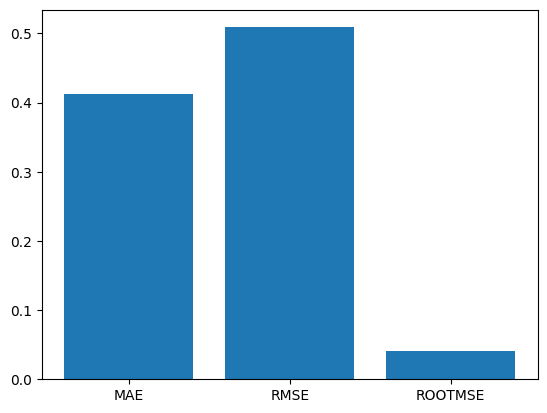

In [59]:
plt.bar(metrics,score)